In [55]:
import pandas as pd
import matplotlib.pyplot as plt
# from NewsSentiment import TargetSentimentClassifier

In [56]:
# tsc = TargetSentimentClassifier()
# tsc.infer_from_text("i hate trump", "trump")

In [57]:
cnn = pd.read_csv('netanyahu_cnn_news_sentiment.csv')
# fox = pd.read_csv('netanyahu_fox_news_sentiment.csv')
fox = cnn

In [58]:
def add_label(row):
    labels = {row['neg_s']: 'Negative', row['pos_s']:'Positive', row['neu_s']:'Neutral'}
    max_val = max(labels.keys())
    row['label'] = labels[max_val]
    row[labels[max_val]] = 1
    labels.pop(max_val)
    for key in labels.keys():
        row[labels[key]] = 0
    return row

cnn = cnn.apply(add_label, axis=1)
fox = fox.apply(add_label, axis=1)

    
    

In [59]:
cnn

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title
0,1,0,0,0,-0.563375,2023-02-26,0.0,Negative,0,0.734499,0,0.174872,0,0.090629,"About 160,000 people protest against Netanyahu..."
1,0,0,1,0,0.998594,2023-02-22,1.0,Positive,0,0.056914,0,0.194281,0,0.748805,11 Palestinians killed during Israeli raid tar...
2,0,1,0,0,0.597924,2023-02-23,2.0,Neutral,0,0.007922,0,0.694093,0,0.297985,Your flight from Israel might be about to get ...
3,0,0,1,0,0.768286,2023-02-23,3.0,Positive,0,0.045981,0,0.449278,0,0.504741,Israel launches airstrikes on Gaza after rocke...
4,1,0,0,0,-0.231305,2023-02-21,4.0,Negative,0,0.395117,0,0.386767,0,0.218116,Opinion: Netanyahu's 'reforms' are threatening...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,1,0,0,-0.028670,2021-12-10,95.0,Neutral,0,0.029244,0,0.955209,0,0.015547,A single sentence that perfectly captures the ...
96,1,0,0,0,-0.782522,2021-11-08,96.0,Negative,0,0.785085,0,0.136233,0,0.078682,Don't count on an end to the Joe Biden-Naftali...
97,1,0,0,0,-1.000000,2021-11-07,97.0,Negative,0,0.982651,0,0.011821,0,0.005528,"Israel doubles down against US, saying there i..."
98,0,1,0,0,0.491891,2021-10-12,98.0,Neutral,0,0.077443,0,0.579635,0,0.342922,Trump's inner circle takes a trip down memory ...


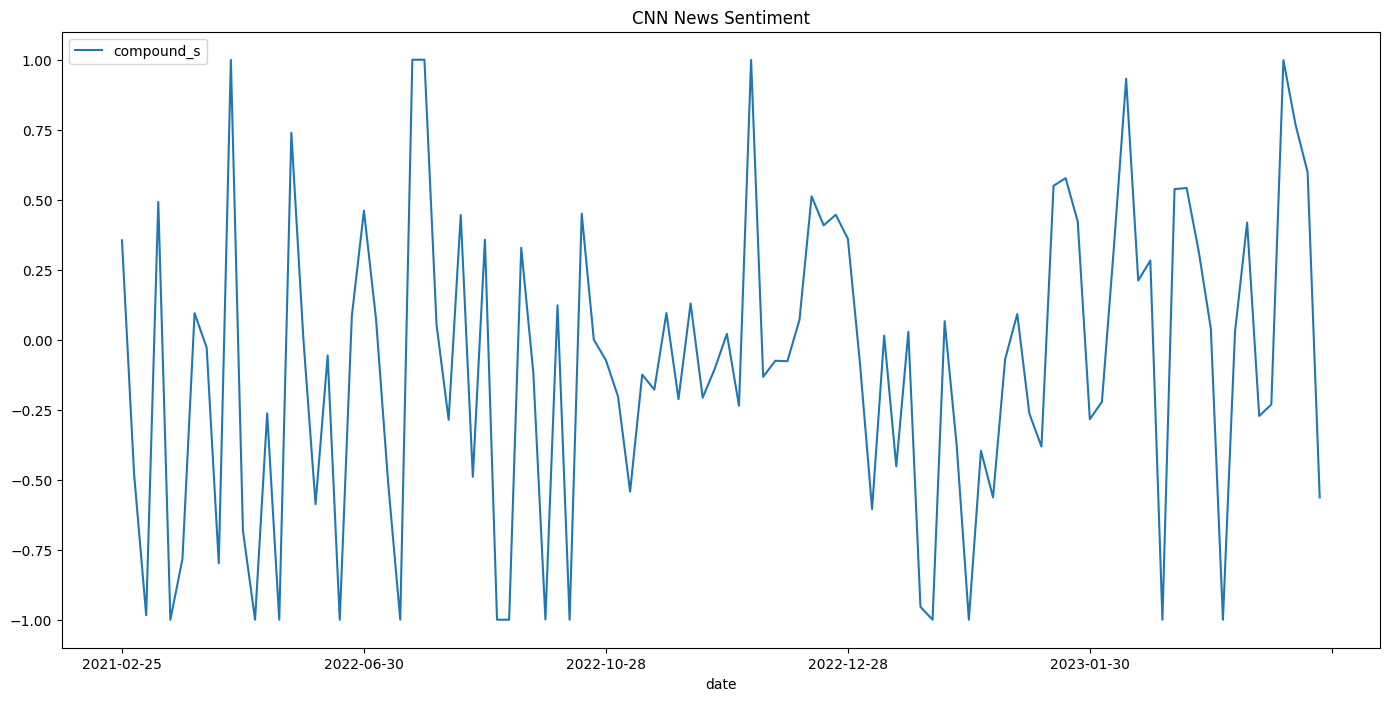

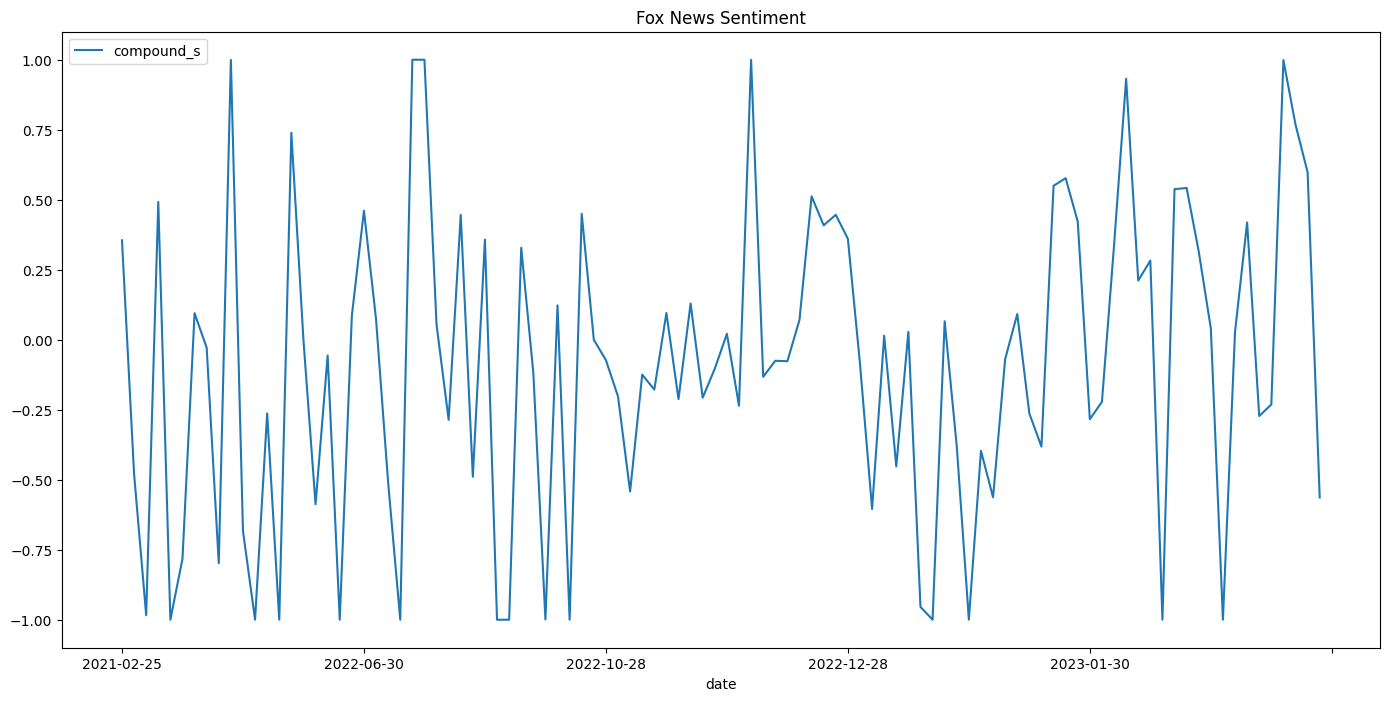

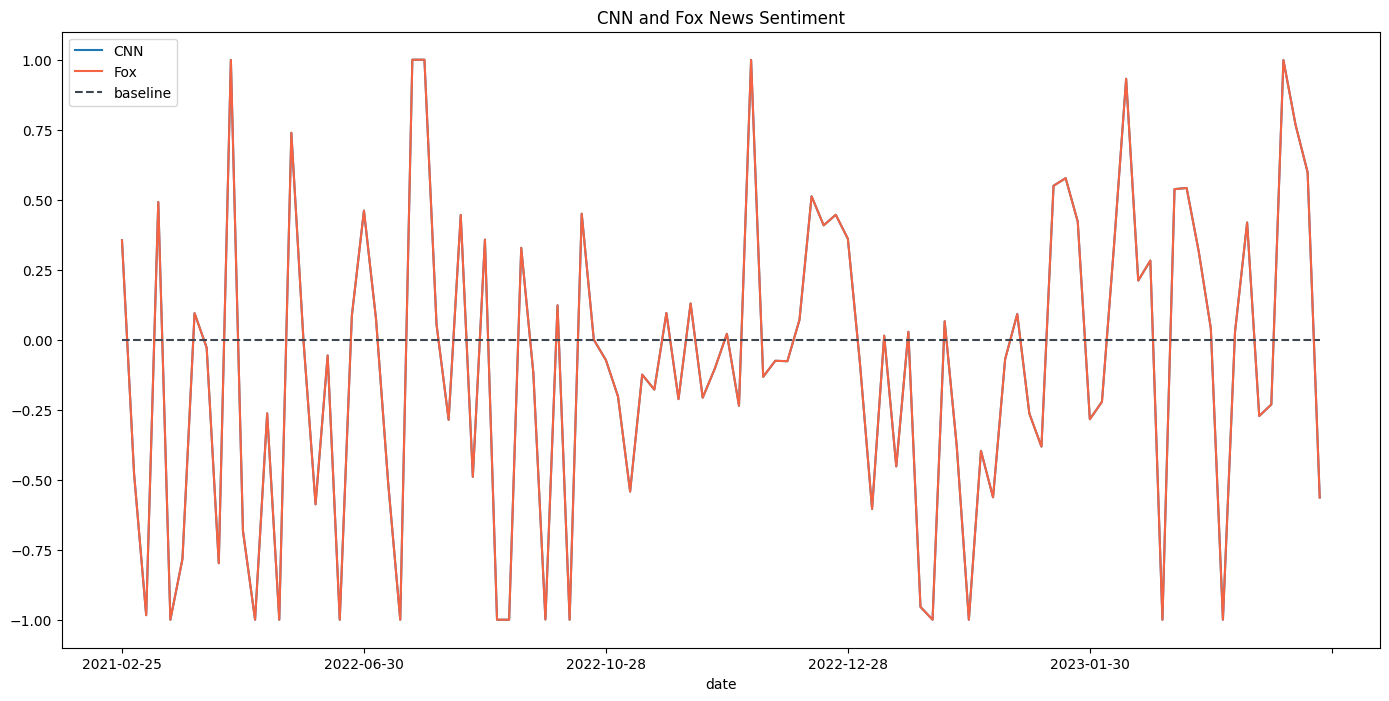

In [60]:
def plot(df:pd.DataFrame, vendor):
    df = df.sort_values(by=['date'])
    axes = df.plot(x='date', y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))


def joined_plot(df1:pd.DataFrame, df2:pd.DataFrame, vendor1, vendor2):    
    df1 = df1.sort_values(by=['date']).rename(columns={'compound_s': vendor1})
    df2 = df2.sort_values(by=['date']).rename(columns={'compound_s': vendor2})
    
    axes = df1.plot(x='date', y=vendor1, kind='line', title=f'{vendor1} and {vendor2} News Sentiment', figsize=(17,8))
    df2.plot(x='date', y=vendor2, kind='line', ax=axes, color='#f56342')
    df3 = pd.DataFrame({'date': df1.date, 'baseline': [0.0]*len(df1)}).plot(x='date', y='baseline', kind='line', ax=axes, color='#40464f', linestyle='--')

plot(cnn, 'CNN')
plot(fox, 'Fox')
joined_plot(cnn, fox, 'CNN', 'Fox')

/tmp/ipykernel_1478/1611372004.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('month').mean().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))


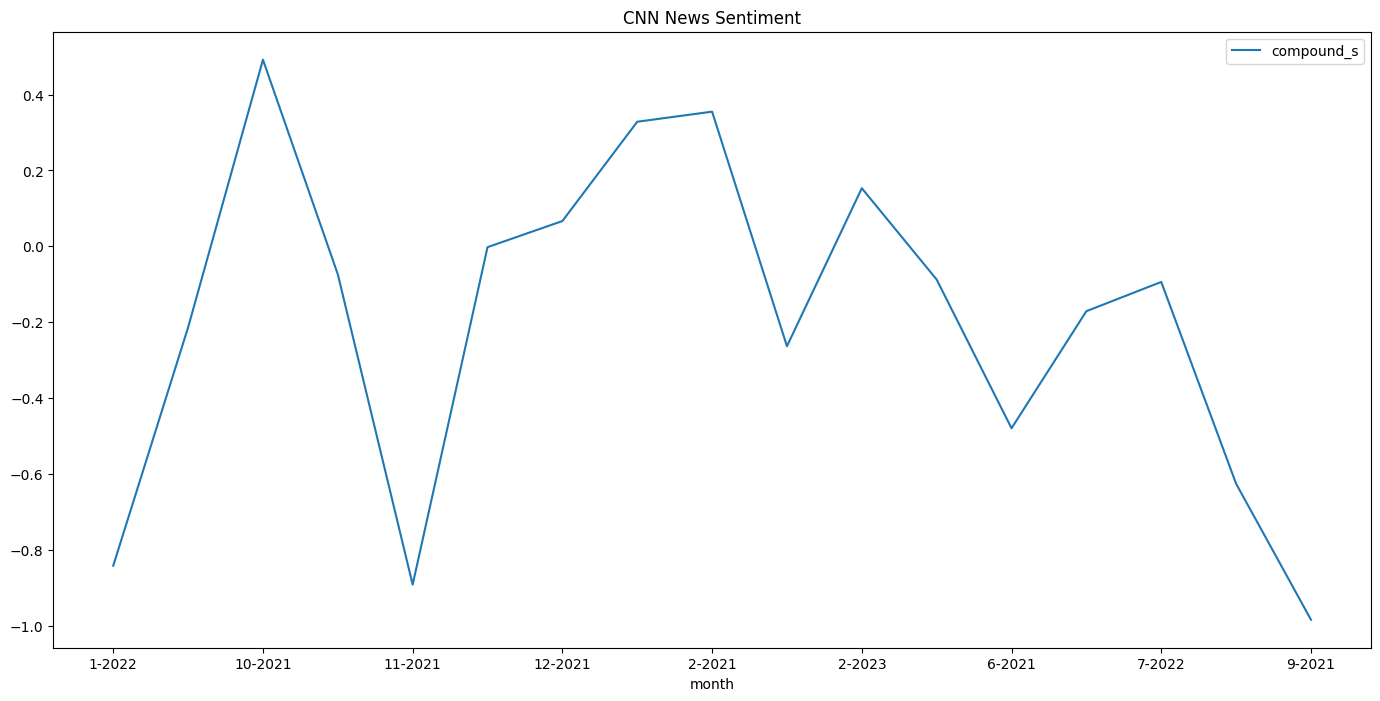

In [61]:
def weekly_avg_plot(df:pd.DataFrame, vendor):
    
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.week.astype(str) + '-' + df['date'].dt.year.astype(str)
    df['date'] = [d.strftime("%Y-%m-D") for d in df['date'].dt.date]
    df = df.sort_values(by=['week'], ascending=False)
    df.groupby('week').mean().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

def monthly_avg_plot(df:pd.DataFrame, vendor):
        
        df['date'] = pd.to_datetime(df['date'])
        df['month'] = df['date'].dt.month.astype(str) + '-' + df['date'].dt.year.astype(str)
        df['date'] = [d.strftime("%Y-%m-D") for d in df['date'].dt.date]
        df = df.sort_values(by=['month'], ascending=False)
        df.groupby('month').mean().plot(y='compound_s', kind='line', title=f'{vendor} News Sentiment', figsize=(17,8))

# weekly_avg_plot(cnn, 'CNN')
monthly_avg_plot(cnn, 'CNN')

44    10
8      8
5      8
28     8
3      8
4      7
45     6
6      5
1      4
26     4
27     4
52     3
51     3
25     3
43     3
49     2
41     2
35     1
2      1
47     1
23     1
32     1
31     1
16     1
14     1
13     1
50     1
38     1
7      1
Name: week, dtype: int64

In [15]:
def add_month(row):
    parts = row['date'].split('-')
    row['month'] = parts[0] + '-' + parts[1]
    return row

cnn = cnn.apply(add_month, axis=1)
fox = fox.apply(add_month, axis=1)

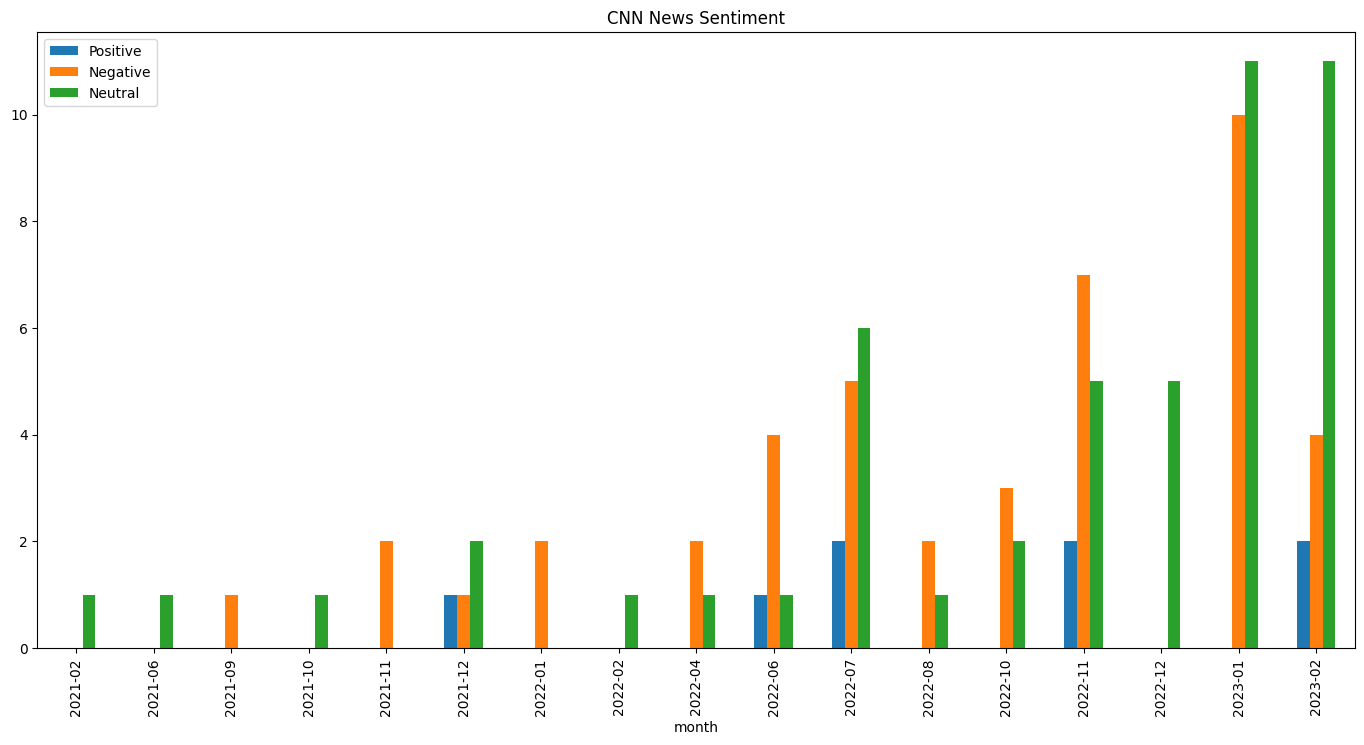

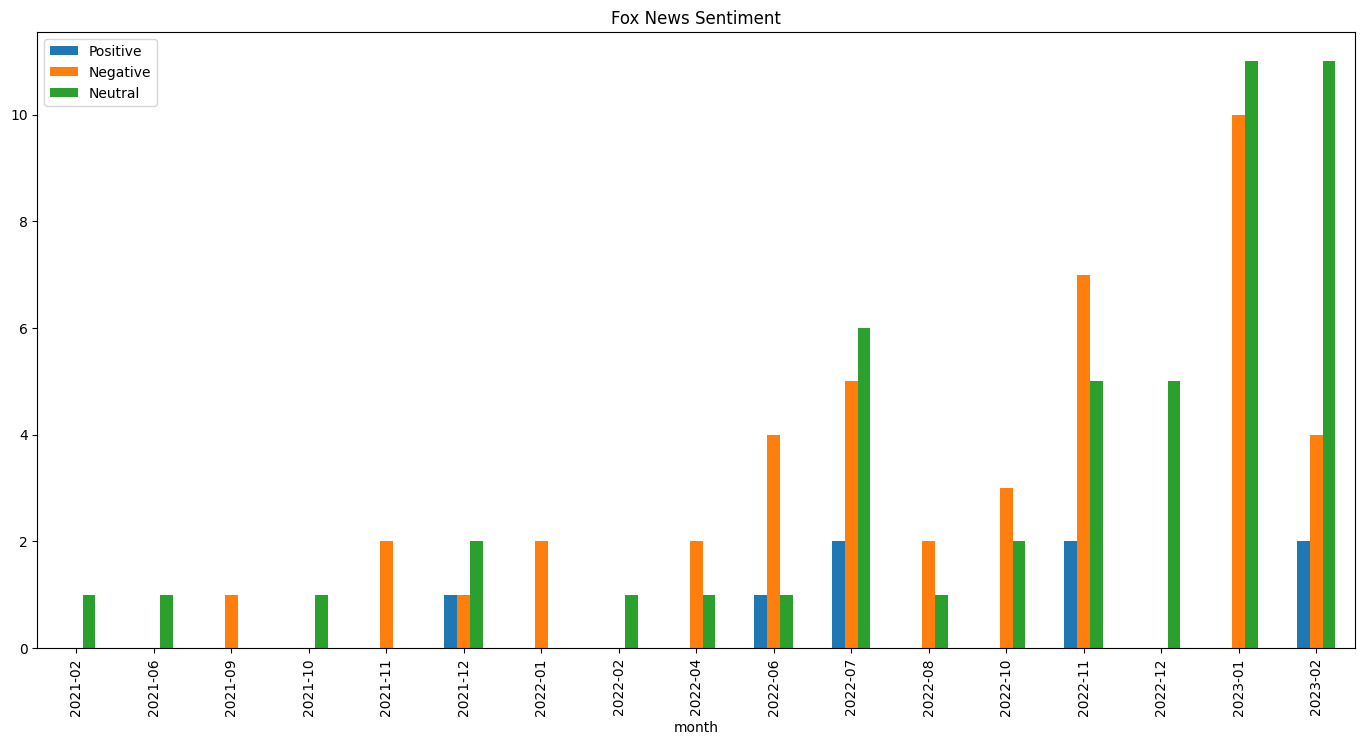

In [16]:
def plot_counts(df:pd.DataFrame, vendor):
    
    df.groupby('month').agg({'Positive':'sum', 'Negative':'sum', 'Neutral':'sum'}).plot(kind='bar', title=f'{vendor} News Sentiment', figsize=(17,8))

plot_counts(cnn, 'CNN')
plot_counts(fox, 'Fox')


In [17]:
fox[cnn.month == '2021-12']

,Negative,Neutral,Positive,compound,compound_s,date,index,label,neg,neg_s,neu,neu_s,pos,pos_s,title,month
92,0,0,1,0,0.999351,2021-12-28,92.0,Positive,0,0.035847,0,0.308572,0,0.655581,Israel announces plan to double Golan Heights ...,2021-12
93,1,0,0,0,-0.798437,2021-12-17,93.0,Negative,0,0.648442,0,0.322871,0,0.028687,Trump uses anti-Semitic tropes to again critic...,2021-12
94,0,1,0,0,0.094809,2021-12-10,94.0,Neutral,0,0.256094,0,0.507726,0,0.236180,Trump accuses Netanyahu of disloyalty for cong...,2021-12
95,0,1,0,0,-0.028670,2021-12-10,95.0,Neutral,0,0.029244,0,0.955209,0,0.015547,A single sentence that perfectly captures the ...,2021-12
